In [45]:
%matplotlib inline

import fitbit
import json
import configparser
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import datetime

In [46]:
config = configparser.RawConfigParser()
config.read('config.ini')

['config.ini']

In [47]:
CLIENT_ID = config.get('ACCOUNT', 'CLIENT_ID')
CLIENT_SECRET = config.get('ACCOUNT', 'CLIENT_SECRET')
ACCESS_TOKEN = config.get('ACCOUNT', 'ACCESS_TOKEN')
REFRESH_TOKEN = config.get('ACCOUNT', 'REFRESH_TOKEN')

In [48]:
authd_client = fitbit.Fitbit(CLIENT_ID, CLIENT_SECRET, access_token = ACCESS_TOKEN, refresh_token = REFRESH_TOKEN)

In [71]:
dates = pd.date_range('2017-03-12', '2017-03-26')

two_week_step_count = []

for date in dates:
    intraday_step = authd_client.intraday_time_series('activities/steps', base_date = date, detail_level = '15min')
    two_week_step_count.append(int(intraday_step['activities-steps'][0]['value']))
    
two_week_step_count

[11352,
 11347,
 12772,
 12193,
 10549,
 15242,
 891,
 7652,
 9500,
 8051,
 4348,
 11267,
 8958,
 8290,
 7233]

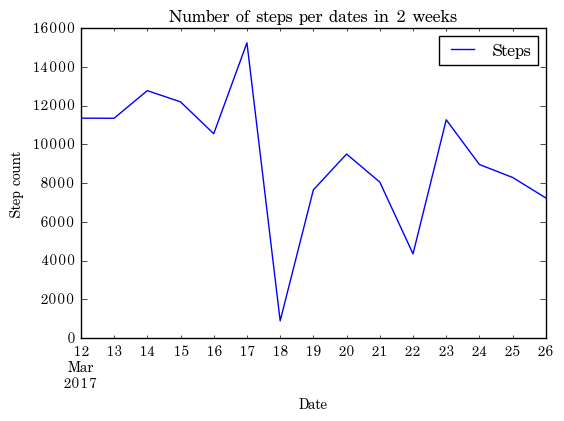

In [72]:
df = pd.DataFrame(two_week_step_count, index = dates)
df.columns = ['Steps']
df.plot()
plt.ylabel('Step count');
plt.xlabel('Date');
plt.title('Number of steps per dates in 2 weeks');
plt.rc('font', family='AppleMyungjo')